# Import Libraries

In [175]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error


# Read Data

In [176]:
data=pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")

## Clean Data 

In [177]:
data.head() 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [179]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [180]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [181]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## Data Preprocessing

In [182]:
feature=['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type','Transmission']
feature_data = data[feature]
feature_data 

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Manual
1,2013,4.75,9.54,43000,Diesel,Manual
2,2017,7.25,9.85,6900,Petrol,Manual
3,2011,2.85,4.15,5200,Petrol,Manual
4,2014,4.60,6.87,42450,Diesel,Manual
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Manual
297,2015,4.00,5.90,60000,Petrol,Manual
298,2009,3.35,11.00,87934,Petrol,Manual
299,2017,11.50,12.50,9000,Diesel,Manual


In [183]:
feature_data.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [184]:
feature_data = pd.get_dummies(data=feature_data, columns=['Fuel_Type'], drop_first=True, dtype=int)

In [185]:
feature_data.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [186]:
feature_data['Transmission'] = feature_data['Transmission'].replace({'Manual': 0, 'Automatic': 1})
feature_data

,Year,Selling_Price,Present_Price,Kms_Driven,Transmission,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000,0,0,1
1,2013,4.75,9.54,43000,0,1,0
2,2017,7.25,9.85,6900,0,0,1
3,2011,2.85,4.15,5200,0,0,1
4,2014,4.60,6.87,42450,0,1,0
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0
297,2015,4.00,5.90,60000,0,0,1
298,2009,3.35,11.00,87934,0,0,1
299,2017,11.50,12.50,9000,0,1,0


## Exploratory Data Analysis

In [187]:
feature_data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Transmission,Fuel_Type_Diesel,Fuel_Type_Petrol
Year,1.000000,0.236141,-0.047584,-0.524342,-0.000394,0.064315,-0.059959
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.367128,0.552339,-0.540571
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.348715,0.473306,-0.465244
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.162510,0.172515,-0.172874
Transmission,-0.000394,0.367128,0.348715,0.162510,1.000000,0.098643,-0.091013
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,0.098643,1.000000,-0.979648
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,-0.091013,-0.979648,1.000000


<Axes: >

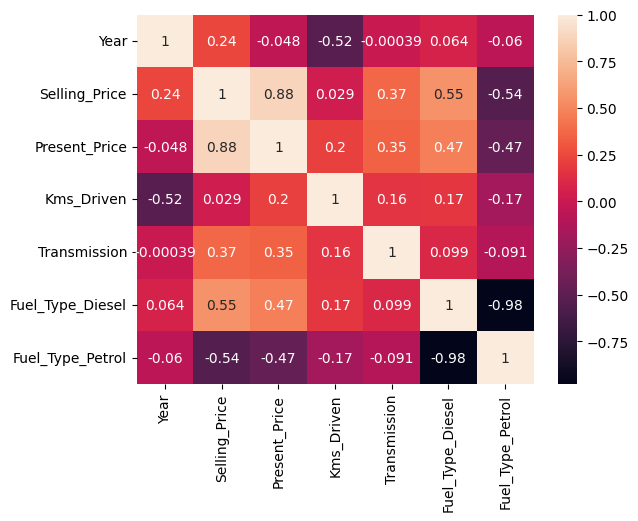

In [188]:
sns.heatmap(feature_data.corr(),annot=True)

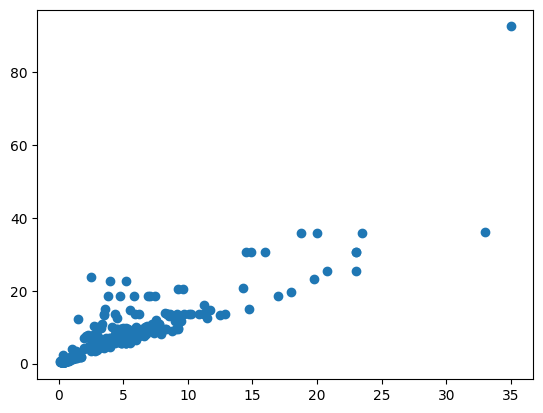

In [189]:
plt.scatter(feature_data['Selling_Price'],feature_data['Present_Price'])
plt.show()

## Data Modeling

In [190]:
y=feature_data['Selling_Price']
x=feature_data[['Present_Price','Kms_Driven','Transmission','Fuel_Type_Diesel','Fuel_Type_Petrol','Year']]

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## LinearRegression model

In [210]:
model=LinearRegression()
model.fit(x_train,y_train)
pre=model.predict(x_test)
print('Train Score is ' ,model.score(x_train, y_train))
print('Test Score is ' ,model.score(x_test, y_test))
print('absolute_error', mean_absolute_error(y_test,pre))

Train Score is  0.8731690205044709
Test Score is  0.8414636949961433
absolute_error 1.4768206688053755


## LassoRegression Model

In [201]:
Lasso_Model = Lasso()
Lasso_Model.fit(x_train, y_train)
y_pred = LassoRegressionModel.predict(x_test)
print('Train Score is ' , LassoRegressionModel.score(x_train, y_train))
print('Test Score is ' , LassoRegressionModel.score(x_test, y_test))
print ('absolute_error', mean_absolute_error(y_test,y_pred))


Train Score is  0.8525458121031829
Test Score is  0.7967011208452717
absolute_error 1.5013135421769659
